In [20]:
# Assuming you have a DataFrame named 'df' with columns: 'day_before_yesterday', 'yesterday', 'today', 'tomorrow'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

action_df = pd.read_csv('./MSFT18-10.csv', sep=';', dtype=float)

## Descripción General:

Este documento proporciona una descripción del modelo de regresión lineal utilizado para realizar predicciones sobre el mercado de valores de una acción del 18 de Sep al 10 de Oct los datos estan el el archivo (MSFT18-10.csv). El modelo utiliza datos históricos de tres días: Antier, Ayer y Hoy para predecir el valor de la acción mañana.
Características:

Antier (Anteayer):
    Valor numérico que representa el precio de la acción dos días antes del día actual.

Ayer:
    Valor numérico que representa el precio de la acción del día anterior.

Hoy:
    Valor numérico que representa el precio de la acción hoy.

## Variable Objetivo:

Mañana:
    Variable objetivo que representa el precio esperado de la acción mañana.

## División de Datos:

Los datos se dividen en conjuntos de entrenamiento y prueba utilizando la función train_test_split de scikit-learn. El 80% de los datos se utiliza para el entrenamiento (X_train e y_train), y el 20% se reserva para las pruebas (X_test e y_test).

## Modelo de Regresión Lineal:

Se utiliza un modelo de regresión lineal para prever el valor de la acción mañana basado en los datos históricos de Antier, Ayer y Hoy.

## Entrenamiento del Modelo:

El modelo se inicializa con la clase LinearRegression y se entrena utilizando los datos de entrenamiento.

## Predicciones y Evaluación:

Se realizan predicciones utilizando el conjunto de prueba, y se evalúa el rendimiento del modelo utilizando la Raíz del Error Cuadrático Medio (RMSE).

## Predicción del Precio de la Acción Mañana:

Se utiliza el modelo entrenado para predecir el precio de la acción mañana con nuevos datos representados como un array de características. En el ejemplo proporcionado, se utiliza un array con valores numéricos para Antier, Ayer y Hoy.

In [21]:
action_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Antier  249 non-null    float64
 1   Ayer    249 non-null    float64
 2   Hoy     249 non-null    float64
 3   Manana  249 non-null    float64
dtypes: float64(4)
memory usage: 7.9 KB


In [22]:
# Feature columns
features = ['Antier', 'Ayer', 'Hoy']

# Target column
target = 'Manana'

# Split the data
X_train, X_test, y_train, y_test = train_test_split(action_df[features], action_df[target], test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")

# Use the model to predict tomorrow's stock price
new_data = np.array([[238, 236, 236]])  # Replace '...' with the feature values for the new data point
prediction_tomorrow = model.predict(new_data)
print(f"Predicted Stock Price for Tomorrow: {prediction_tomorrow[0]}")

Root Mean Squared Error: 5.019738228976958
Predicted Stock Price for Tomorrow: 237.50321507390126


/home/xhapa/anaconda3/envs/adv-sci/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


2. Tome un conjunto de manzanas, un conjunto de peras, un conjunto de bananos y
un conjunto de fresas. Desarrolle un sistema clasificador de estas cuatro frutas, de
manera que después de entrenar la red se le den imágenes de frutas de internet y
el sistema las clasifique. Obténgalos de: https://www.kaggle.com/moltean/fruits

### Importación de Bibliotecas:
* NumPy y Pandas para la manipulación de datos.
* Keras para construir y entrenar la red neuronal.
* Matplotlib para graficar imágenes.
* os para interactuar con el sistema operativo.
* glob para encontrar todas las rutas que coincidan con un patrón especificado.

In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.models import Sequential
from keras.layers import Dense, Conv2D,MaxPool2D,Dropout,Flatten
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import glob
import matplotlib.pyplot as plt

### Carga y Visualización de una Imagen de Ejemplo:
El script carga y muestra una imagen de ejemplo del conjunto de entrenamiento, la carpeta de drive ./Fruits/ (https://drive.google.com/drive/folders/1RGG1eUQF03dREC-xzfokJa0-zbfClNFh?usp=sharing) debe estar ubicada dentro de la carpeta Cap 5/ para que pueda ser cargada al notebook.

In [24]:
import os
for dirname, _, filenames in os.walk('./Fruits'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Fruits/fruits-360-original-size/fruits-360-original-size/readme.md
./Fruits/fruits-360-original-size/fruits-360-original-size/Meta/apple_6/info.txt
./Fruits/fruits-360-original-size/fruits-360-original-size/Meta/apple_braeburn_1/info.txt
./Fruits/fruits-360-original-size/fruits-360-original-size/Meta/apple_golden_3/info.txt
./Fruits/fruits-360-original-size/fruits-360-original-size/Meta/apple_red_3/info.txt
./Fruits/fruits-360-original-size/fruits-360-original-size/Meta/zucchini_dark_1/info.txt
./Fruits/fruits-360-original-size/fruits-360-original-size/Meta/cucumber_3/info.txt
./Fruits/fruits-360-original-size/fruits-360-original-size/Meta/apple_crimson_snow_1/info.txt
./Fruits/fruits-360-original-size/fruits-360-original-size/Meta/cucumber_1/info.txt
./Fruits/fruits-360-original-size/fruits-360-original-size/Meta/pear_1/info.txt
./Fruits/fruits-360-original-size/fruits-360-original-size/Meta/apple_red_yellow_1/info.txt
./Fruits/fruits-360-original-size/fruits-360-original-size/Meta/

### Configuración de Rutas:
Especifica las rutas para los conjuntos de entrenamiento y prueba.

In [25]:
train_path ="./Fruits/fruits-360_dataset/fruits-360/Training"
test_path = "./Fruits/fruits-360_dataset/fruits-360/Test"
train_path

'./Fruits/fruits-360_dataset/fruits-360/Training'

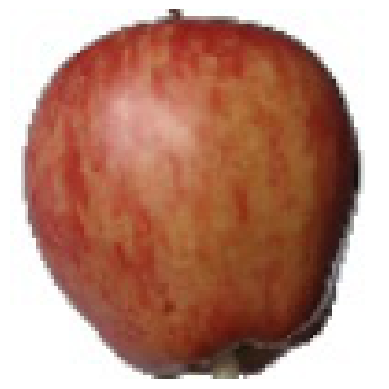

In [26]:
img = load_img("./Fruits/fruits-360_dataset/fruits-360/Training/Apple Red 1/0_100.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()

In [27]:


x = img_to_array(img)
print(x.shape)

(100, 100, 3)


In [28]:
className = glob.glob(train_path + "/*")
numberofclass = len(className)
print("numberofclass:" , numberofclass)



numberofclass: 131


### Construcción de la Red Neuronal Convolucional (CNN):
Define un modelo secuencial con capas convolucionales y de agrupación, seguidas de capas densas.
Utiliza la función de activación ReLU para las capas convolucionales y softmax para la capa de salida.
Incluye dropout para regularización.

In [29]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),input_shape=(x.shape),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(1024, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(numberofclass,activation="softmax"))


model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])
batch_size= 32

In [30]:
train_data_generater = ImageDataGenerator(rescale=1./255,
                   shear_range=0.3,
                   horizontal_flip=True,
                   zoom_range=0.3,  
                   
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [31]:
train_Generator = train_data_generater.flow_from_directory(train_path,target_size=x.shape[:2],
                                                          batch_size= batch_size,
                                                          color_mode="rgb",
                                                          class_mode="categorical")

test_Generator = test_datagen.flow_from_directory(test_path,
                                                  target_size=x.shape[:2],
                                                    batch_size=batch_size,
                                                    color_mode="rgb",
                                                    class_mode="categorical")

history = model.fit(
    train_Generator,
    steps_per_epoch=1600 // batch_size,
    epochs=50,
    validation_data=test_Generator,
    validation_steps=800 // batch_size
)


Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.
Epoch 1/50
50/50 [==============================] - 8s 161ms/step - loss: 4.7144 - accuracy: 0.0294 - val_loss: 4.3133 - val_accuracy: 0.0437
Epoch 2/50
50/50 [==============================] - 8s 163ms/step - loss: 4.0270 - accuracy: 0.0619 - val_loss: 3.5002 - val_accuracy: 0.1437
Epoch 3/50
50/50 [==============================] - 8s 163ms/step - loss: 3.4187 - accuracy: 0.1325 - val_loss: 2.8622 - val_accuracy: 0.3125
Epoch 4/50
50/50 [==============================] - 8s 164ms/step - loss: 2.8739 - accuracy: 0.2225 - val_loss: 2.2774 - val_accuracy: 0.3725
Epoch 5/50
50/50 [==============================] - 8s 166ms/step - loss: 2.4086 - accuracy: 0.3219 - val_loss: 1.9451 - val_accuracy: 0.4275
Epoch 6/50
50/50 [==============================] - 8s 166ms/step - loss: 2.1311 - accuracy: 0.3719 - val_loss: 1.7825 - val_accuracy: 0.4900
Epoch 7/50
50/50 [==============================] - 8s 166

* model: Se refiere al modelo de Keras que has definido.
* save_weights: Este es un método en Keras que guarda los pesos del modelo.
* "deneme.h5": Este es el nombre del archivo donde se guardarán los pesos. La extensión ".h5" se usa comúnmente para archivos en el formato Hierarchical Data Format version 5 (HDF5), que es un formato de archivo utilizado para almacenar grandes cantidades de datos numéricos.

In [32]:
model.save_weights("deneme.h5")

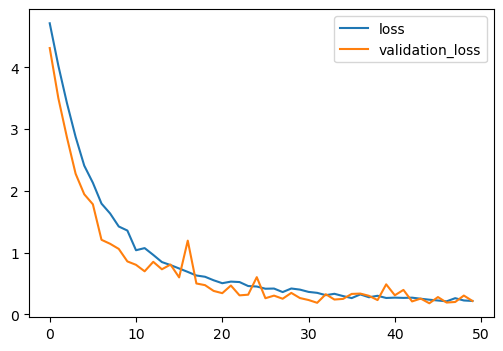

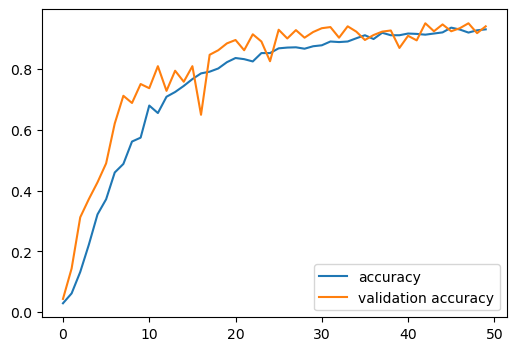

In [33]:
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"],label="loss")
plt.plot(history.history["val_loss"],label="validation_loss")
plt.legend()
plt.show()
plt.figure(figsize=(6,4))
plt.plot(history.history["accuracy"],label="accuracy")
plt.plot(history.history["val_accuracy"],label="validation accuracy")
plt.legend()
plt.show()



3. Los archivos que acompañan MEP incluyen conjuntos de entrenamiento para varios
ejemplos, tome uno de los ejemplos y utilice los datos para realizar la misma tarea
por RNAs.

## Descripción del Conjunto de Datos:

El conjunto de datos utilizado en esta documentación está relacionado con la diabetes y consta de ocho características (f1 a f8) y una variable objetivo. Cada registro en el conjunto de datos representa un conjunto de mediciones o atributos relacionados con la diabetes, y la variable objetivo indica la presencia o ausencia de diabetes (clasificación binaria).
### Características:

f1-f8:
Estas son ocho características diferentes que representan diversas mediciones o características relacionadas con la diabetes. El significado específico de cada característica no se proporciona en el fragmento de código, y sería crucial consultar la documentación original o la fuente del conjunto de datos para comprender en detalle estas características.

### Variable Objetivo:

target:
Esta variable es binaria y sirve como objetivo para el modelo de aprendizaje automático. Indica la presencia (1) o ausencia (0) de diabetes según las características de entrada.

In [34]:
diabetes_df = pd.read_csv('./Diabetes.csv', sep=' ',  dtype=float)
diabetes_df

f1     f2        f3    f4        f5        f6        f7        f8  \
0    0.176471  0.605  0.426230  0.00  0.000000  0.536513  0.020922  0.066667   
1    0.352941  0.720  0.590164  0.27  0.269504  0.505216  0.075576  0.316667   
2    0.117647  0.875  0.721311  0.00  0.000000  0.341282  0.105892  0.016667   
3    0.705882  0.605  0.639344  0.17  0.000000  0.394933  0.077284  0.683333   
4    0.117647  0.535  0.606557  0.30  0.118203  0.500745  0.139197  0.033333   
..        ...    ...       ...   ...       ...       ...       ...       ...   
379  0.470588  0.940  0.639344  0.00  0.000000  0.713860  0.025192  0.366667   
380  0.235294  0.495  0.557377  0.38  0.000000  0.488823  0.028608  0.200000   
381  0.058824  0.535  0.409836  0.19  0.000000  0.421759  0.043979  0.133333   
382  0.000000  0.505  0.532787  0.28  0.000000  0.366617  0.067891  0.016667   
383  0.176471  0.510  0.360656  0.20  0.111111  0.459016  0.137489  0.083333   

     target  
0       1.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
..      ...  
379     1.0  
380     0.0  
381     0.0  
382     0.0  
383     0.0  

[384 rows x 9 columns]

## Preprocesamiento de Datos:

* Carga de Datos:
El conjunto de datos se carga desde un archivo CSV llamado 'Diabetes.csv' utilizando la función read_csv de pandas. Se asume que los datos están separados por espacios.

* División de Datos:
El conjunto de datos se divide en conjuntos de entrenamiento y prueba utilizando la función train_test_split de scikit-learn. Se utiliza el 80% de los datos para el entrenamiento (X_train y y_train), y el 20% se reserva para las pruebas (X_test y y_test).

* Estandarización:
Los datos de las características se estandarizan utilizando la función StandardScaler de scikit-learn. Este paso garantiza que todas las características tengan una media de 0 y una desviación estándar de 1, lo cual es una práctica común en el aprendizaje automático para mejorar el rendimiento del modelo.

### Modelo de Red Neuronal Convolucional (CNN):

El fragmento de código implementa una red neuronal convolucional (CNN) simple utilizando la biblioteca Keras. La arquitectura del modelo es la siguiente:

* Capa de Entrada:
    Capa de convolución con 32 filtros, tamaño del núcleo (3, 1) y función de activación ReLU. Espera una entrada con forma (8, 1, 1), asumiendo que hay 8 características.

* Capa de MaxPooling:
    Reduce las dimensiones espaciales de los datos utilizando max pooling con un tamaño de agrupación de (2, 1).

* Capa de Aplanado:
    Aplana la salida de la capa anterior en un array unidimensional.

* Capas Densas:
    Dos capas densas (totalmente conectadas) con activación ReLU. La primera capa tiene 64 neuronas.

* Capa de Salida:
    Capa densa 

In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from keras import layers


# Extract features (X) and target variable (y)
features = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8']
X = diabetes_df[features]
y = diabetes_df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data for CNN (assuming you have 8 features)
X_train = X_train.reshape(X_train.shape[0], 8, 1, 1)
X_test = X_test.reshape(X_test.shape[0], 8, 1, 1)

# Build the CNN model
model = keras.Sequential([
    layers.Conv2D(32, (3, 1), activation='relu', input_shape=(8, 1, 1)),
    layers.MaxPooling2D((2, 1)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss:.4f}, Test Accuracy: {accuracy:.4f}')

Epoch 1/10
10/10 [==============================] - 1s 14ms/step - loss: 0.6619 - accuracy: 0.6808 - val_loss: 0.6263 - val_accuracy: 0.6623
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 0.6067 - accuracy: 0.6775 - val_loss: 0.6046 - val_accuracy: 0.6364
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5810 - accuracy: 0.6775 - val_loss: 0.5782 - val_accuracy: 0.6883
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5572 - accuracy: 0.7068 - val_loss: 0.5339 - val_accuracy: 0.7403
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5362 - accuracy: 0.7557 - val_loss: 0.5083 - val_accuracy: 0.7792
Epoch 6/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5193 - accuracy: 0.7752 - val_loss: 0.4862 - val_accuracy: 0.7922
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 0.5073 - accuracy: 0.7850 - val_loss: 0.4725 - val_accuracy: 0.7922
Epoch 8/10
10/10 [=

## Compilación y Entrenamiento del Modelo:

El modelo se compila utilizando el optimizador Adam y la función de pérdida de entropía cruzada binaria, que es adecuada para problemas de clasificación binaria. El entrenamiento se realiza durante 10 generaciones con un tamaño de lote de 32.

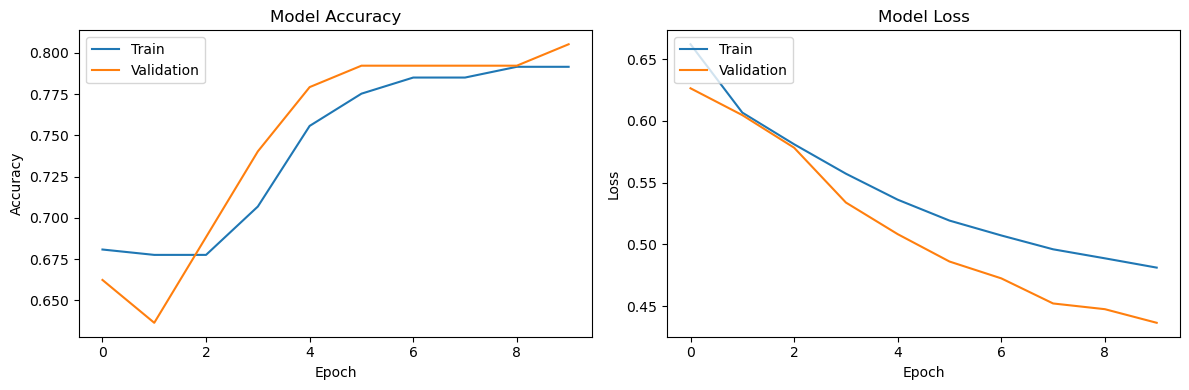

In [36]:
# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()